In [27]:
pip install pandas numpy pypiwin32 seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 1000)        # set wide display to prevent wrapping
pd.set_option('display.max_colwidth', None) # don't truncate text in cells


movies_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_5000_credits.csv')

print("Movies DataFrame Shape:", movies_df.shape)
print("Credits DataFrame Shape:", credits_df.shape)

movies_df.head()



Movies DataFrame Shape: (4803, 20)
Credits DataFrame Shape: (4803, 4)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret agent""}, {""id"": 9663, ""name"": ""sequel""}, {""id"": 14555, ""name"": ""mi6""}, {""id"": 156095, ""name"": ""british secret service""}, {""id"": 158431, ""n

In [30]:
print("==== MOVIES DF INFO ====")
movies_df.info()

print("\n==== CREDITS DF INFO ====")
credits_df.info()

==== MOVIES DF INFO ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 

In [31]:
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)
merged_df = movies_df.merge(credits_df, on='id')
merged_df.rename(columns={'title_x': 'title'}, inplace=True)

print("\nMerged DataFrame Shape:", merged_df.shape)
merged_df.head()

# Check for duplicates
duplicates = merged_df.duplicated().sum()
print(f"\nNumber of duplicate rows in merged data: {duplicates}")


Merged DataFrame Shape: (4803, 23)

Number of duplicate rows in merged data: 0


In [32]:
missing_values = merged_df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64


In [33]:
merged_df['overview'] = merged_df['overview'].fillna('unknown')
merged_df['homepage'] = merged_df['homepage'].fillna('none')
merged_df['tagline'] = merged_df['tagline'].fillna('none')

In [34]:
merged_df[merged_df.isnull().any(axis=1)]



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_y,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",none,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""name"": ""biography""}]",it,Chiamatemi Francesco - Il Papa della gente,unknown,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,none,Chiamatemi Francesco - Il Papa della gente,7.3,12,Chiamatemi Francesco - Il Papa della gente,"[{""cast_id"": 5, ""character"": ""Jorge Mario Bergoglio da giovane"", ""credit_id"": ""566001d292514179040024b1"", ""gender"": 0, ""id"": 18478, ""name"": ""Rodrigo de la Serna"", ""order"": 0}, {""cast_id"": 6, ""character"": ""Jorge Mario Bergoglio da anziano"", ""credit_id"": ""566001d992514179130025b6"", ""gender"": 2, ""id"": 127252, ""name"": ""Sergio Hern\u00e1ndez"", ""order"": 1}, {""cast_id"": 7, ""character"": ""Franz Jalics"", ""credit_id"": ""566001df925141220400163f"", ""gender"": 2, ""id"": 28514, ""name"": ""\u00c0lex Brendem\u00fchl"", ""order"": 2}, {""cast_id"": 8, ""character"": ""Giovane Prete"", ""credit_id"": ""566001e592514179130025b9"", ""gender"": 2, ""id"": 1133330, ""name"": ""Maximilian Dirr"", ""order"": 3}, {""cast_id"": 9, ""character"": ""Esther Ballestrino"", ""credit_id"": ""566001ed925141790a00258d"", ""gender"": 1, ""id"": 18499, ""name"": ""Mercedes Mor\u00e1n"", ""order"": 4}, {""cast_id"": 11, ""character"": ""Padre Pedro"", ""credit_id"": ""566001fc92514179060023ec"", ""gender"": 0, ""id"": 1544273, ""name"": ""Andres Gil"", ""order"": 5}, {""cast_id"": 12, ""character"": ""Card. Tarcisio Bertone"", ""credit_id"": ""56600205925141790f0025fc"", ""gender"": 0, ""id"": 1385124, ""name"": ""Claudio De Davide"", ""order"": 6}, {""cast_id"": 13, ""character"": ""Mons. Enrique Angelelli"", ""credit_id"": ""5660020e925141790c002497"", ""gender"": 0, ""id"": 230212, ""name"": ""Pompeyo Audivert"", ""order"": 7}, {""cast_id"": 15, ""character"": ""Gabriela"", ""credit_id"": ""59a90ca5c3a368767100f382"", ""gender"": 0, ""id"": 1880274, ""name"": ""Paula Baldini"", ""order"": 8}, {""cast_id"": 16, ""character"": ""Quique"", ""credit_id"": ""59a90cfd925141579d0275f9"", ""gender"": 0, ""id"": 1880275, ""name"": ""Marco Di Tieri"", ""order"": 9}, {""cast_id"": 10, ""character"": """", ""credit_id"": ""566001f59251412204001646"", ""gender"": 0, ""id"": 549598, ""name"": ""Muriel Santa Ana"", ""order"": 10}]","[{""credit_id"": ""5660019ac3a36875f100252b"", ""department"": ""Directing"", ""gender"": 0, ""id"": 59911, ""job"": ""Director"", ""name"": ""Daniele Luchetti""}, {""credit_id"": ""566001a0c3a36875f4002423"", ""department"": ""Writing"", ""gender"": 0, ""id"": 59911, ""job"": ""Screenplay"", ""name"": ""Daniele Luchetti""}, {""credit_id"": ""579cfe66c3a36837b2000edf"", ""department"": ""Sound"", ""gender"": 0, ""id"": 68016, ""job"": ""Orchestrator"", ""name"": ""Kevin Kaska""}, {""credit_id"": ""566001abc3a36875e200250f"", ""department"": ""Writing"", ""gender"": 0, ""id"": 69868, ""job"": ""Screenplay"", ""name"": ""Mart\u00edn Salinas""}, {""credit_id"": ""566001b6c3a36875f4002429"", ""department"": ""Production"", ""gender"": 0, ""id"": 120128, ""job"": ""Producer"", ""name"": ""Pietro Valsecchi""}, {""credit_id"": ""566001c1925141790f0025eb"", ""department"": ""Sound"", ""gender"": 0, ""id"": 1544272, ""job"": ""Original Music Composer"", ""name"": ""Arturo Cardel\u00fas""}]"
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",none,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822, ""name"": ""actors""}, {""id"": 233443, ""name"": ""legendary perfomer""}, {""id"": 235277, ""name"": ""classic hollywood""}, {""id"": 235690, ""name"": ""frank sinatra""}, {""id"": 235691, "

In [35]:
merged_df.dropna(axis=0, how='any', inplace=True)
print(merged_df.isnull().sum())

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64


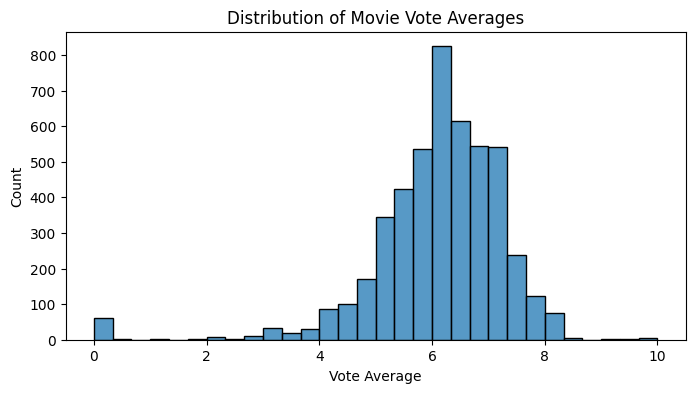

In [36]:
plt.figure(figsize=(8,4))
sns.histplot(merged_df['vote_average'], bins=30, kde=False)
plt.title('Distribution of Movie Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()

In [37]:
import ast

def parse_genres(genre_str):
    genres_list = []
    try:
        genres_data = ast.literal_eval(genre_str)
        for g in genres_data:
            genres_list.append(g['name'])
    except:
        pass
    return genres_list


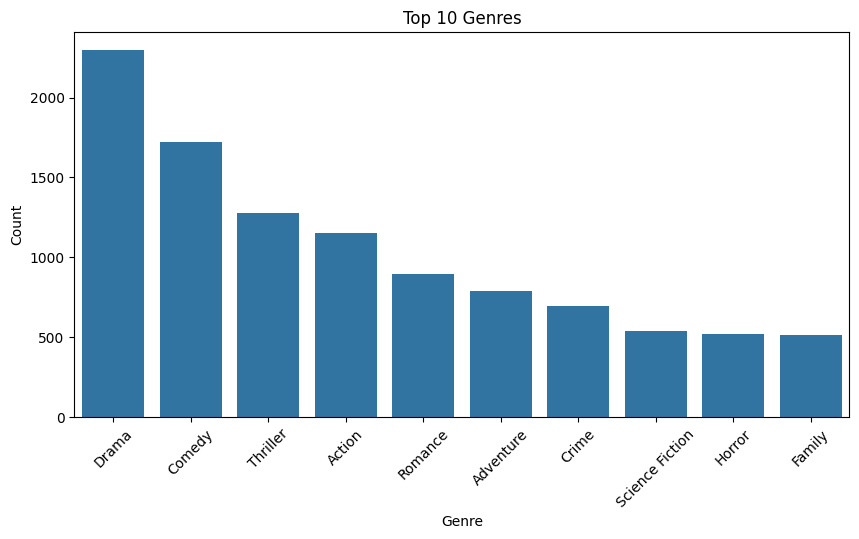

In [38]:
merged_df['parsed_genres'] = merged_df['genres'].apply(parse_genres)

all_genres = []
for g_list in merged_df['parsed_genres']:
    all_genres.extend(g_list)

genre_counts = pd.Series(all_genres).value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10])
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 A common approach to rank movies by a weighted rating formula:
 Weighted Rating (WR) = (v/(v+m)) * R + (m/(v+m)) * C
 where:
   R = average rating for the movie
   v = number of votes for the movie
   m = minimum votes required to be considered
   C = mean vote across all movies

In [39]:
C = merged_df['vote_average'].mean()
m = merged_df['vote_count'].quantile(0.90)

print(f"Average vote across all movies (C) = {C}")
print(f"Minimum votes required (m) = {m}")

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(v+m) * C)

Average vote across all movies (C) = 6.094458333333334
Minimum votes required (m) = 1841.100000000004


In [40]:
popular_movies = merged_df[merged_df['vote_count'] >= m].copy()
popular_movies['score'] = popular_movies.apply(weighted_rating, axis=1)

popular_movies = popular_movies.sort_values('score', ascending=False)

print("\n=== Top 10 Movies by Weighted Rating ===")
print(popular_movies[['title', 'vote_count', 'vote_average', 'score']].head(10))


=== Top 10 Movies by Weighted Rating ===
                                              title  vote_count  vote_average     score
1881                       The Shawshank Redemption        8205           8.5  8.059148
662                                      Fight Club        9413           8.3  7.939187
65                                  The Dark Knight       12002           8.2  7.919968
3232                                   Pulp Fiction        8428           8.3  7.904579
96                                        Inception       13752           8.1  7.863203
3337                                  The Godfather        5893           8.4  7.851167
95                                     Interstellar       10867           8.1  7.809445
809                                    Forrest Gump        7927           8.2  7.803146
329   The Lord of the Rings: The Return of the King        8064           8.1  7.727222
1990                        The Empire Strikes Back        5879           8.2 